# 1. 시간대별 군구별 총 or 평균 충전량 추이 
   
# 2. 건물 level별 시간대별 평균 충전량 추이

## 각 충전소 시간대별 추이

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 130)

In [2]:
ch_use_18 = pd.read_csv("4.1 충전소 사용내역_2018.CSV", encoding = "CP949")
ch_use_18.head(1)

,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,공용,G-Tower(경제자유구역청),인천광역시 연수구 아트센터대로 175,2017-11-17,급속,28.47,2018-04-23 09:21:05


In [3]:
ch_use_18[ ch_use_18['충전소'] == '인천항 크루즈터미널']

,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시


In [4]:
ch_use_19 = pd.read_csv("4.2 충전소 사용내역_2019.CSV", encoding = "CP949")
ch_use_19.loc[20024:20037, '주소'] = ['인천광역시 연수구 국제항만대로 438'] *14
# ch_use_19[ ch_use_19['충전소'] == '인천항 크루즈터미널'] = ['인천광역시 연수구 국제항만대로 438'] * len(ch_use_19[ ch_use_19['충전소'] == '인천항 크루즈터미널'])
ch_use_19.head(1)

,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,공용,G-Tower(경제자유구역청),인천광역시 연수구 아트센터대로 175,2017-11-17,급속,14.7,2019-01-01 16:41:50


In [5]:
ch_use = pd.concat([ch_use_18, ch_use_19], axis = 0,ignore_index = True)
ch_use.head(1)

,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,공용,G-Tower(경제자유구역청),인천광역시 연수구 아트센터대로 175,2017-11-17,급속,28.47,2018-04-23 09:21:05


In [6]:
print(len(ch_use_18) , len(ch_use_19), len(ch_use_18) + len(ch_use_19), len(ch_use))

28598 25821 54419 54419


In [7]:
ch_use.iloc[ len(ch_use_18)-2 : len(ch_use_18) + 2, :]

,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
28596,공용,홈플러스 작전점,인천광역시 계양구 계양대로 27,2017-11-17,급속,41.34,2018-12-31 17:06:06
28597,공용,홈플러스 작전점,인천광역시 계양구 계양대로 27,2017-11-17,급속,37.59,2018-12-31 19:04:32
28598,공용,G-Tower(경제자유구역청),인천광역시 연수구 아트센터대로 175,2017-11-17,급속,14.70,2019-01-01 16:41:50
28599,공용,G-Tower(경제자유구역청),인천광역시 연수구 아트센터대로 175,2017-11-17,급속,24.86,2019-01-02 07:17:37


In [8]:
ch_use = ch_use.loc[: , ['용도별', '충전소', '충전량(kWh)', '시작일시','주소']]
ch_use.head(2)

,용도별,충전소,충전량(kWh),시작일시,주소
0,공용,G-Tower(경제자유구역청),28.47,2018-04-23 09:21:05,인천광역시 연수구 아트센터대로 175
1,공용,G-Tower(경제자유구역청),17.97,2018-04-23 17:47:28,인천광역시 연수구 아트센터대로 175


In [9]:
ch_use['군구명'] = list(map(lambda x : x.split(' ')[1], ch_use['주소']))
ch_use['연월'] = list(map(lambda x : x[:7], ch_use['시작일시']))
ch_use['시간'] = list(map(lambda x : str(int(x[11:13])), ch_use['시작일시']))
ch_use.head(3)

,용도별,충전소,충전량(kWh),시작일시,주소,군구명,연월,시간
0,공용,G-Tower(경제자유구역청),28.47,2018-04-23 09:21:05,인천광역시 연수구 아트센터대로 175,연수구,2018-04,9
1,공용,G-Tower(경제자유구역청),17.97,2018-04-23 17:47:28,인천광역시 연수구 아트센터대로 175,연수구,2018-04,17
2,공용,G-Tower(경제자유구역청),8.21,2018-04-24 09:12:16,인천광역시 연수구 아트센터대로 175,연수구,2018-04,9


# Graph

# 1. 시간대별 군구별 총 or 평균 충전량 추이

In [10]:
ch_year_mon = ch_use.groupby([ '연월']).sum()
x = ch_year_mon.index
y = ch_year_mon.iloc[:, 0]

In [11]:
ch_year_mon

,충전량(kWh)
연월,
2018-01,13335.017
2018-02,11929.241
2018-03,15409.343
2018-04,18955.060
2018-05,22832.213
2018-06,35323.956
2018-07,48859.429
2018-08,58797.271
2018-09,55943.720


In [12]:
ch_year_mon['연월'] = list(ch_year_mon.index)
ch_year_mon

,충전량(kWh),연월
연월,,
2018-01,13335.017,2018-01
2018-02,11929.241,2018-02
2018-03,15409.343,2018-03
2018-04,18955.060,2018-04
2018-05,22832.213,2018-05
2018-06,35323.956,2018-06
2018-07,48859.429,2018-07
2018-08,58797.271,2018-08
2018-09,55943.720,2018-09


In [13]:
ch_year_mon

,충전량(kWh),연월
연월,,
2018-01,13335.017,2018-01
2018-02,11929.241,2018-02
2018-03,15409.343,2018-03
2018-04,18955.060,2018-04
2018-05,22832.213,2018-05
2018-06,35323.956,2018-06
2018-07,48859.429,2018-07
2018-08,58797.271,2018-08
2018-09,55943.720,2018-09


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

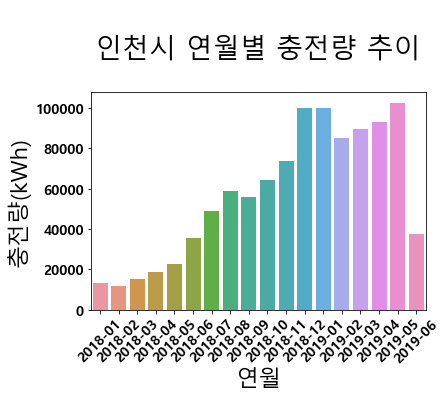

In [15]:
sns.barplot(x = "연월", y = "충전량(kWh)", data = ch_year_mon)
plt.title("\n인천시 연월별 충전량 추이\n", fontsize = 27)
plt.xticks(rotation = 45, fontsize=14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel('연월', fontsize = 23 )
plt.ylabel('충전량(kWh)', fontsize = 23)
fig = plt.gcf()
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig( r'C:\Users\USER\Desktop\전기차\11.08_회의자료\인천시_n별_충전량\인천시 연월별 충전량 추이.jpg',
            dpi= 100 , quality = 100,  bbox_inches='tight') 

In [16]:
ch_gg_year_mon = ch_use.groupby(['군구명', '연월']).sum()
ch_gg_year_mon

충전량(kWh)
군구명 연월                
강화군 2018-01    522.280
    2018-02    703.140
    2018-03    702.240
    2018-04   1782.730
    2018-05   1673.370
    2018-06   2171.430
    2018-07   2055.220
    2018-08   2189.530
    2018-09   2438.310
    2018-10   2249.850
    2018-11   2424.580
    2018-12   3951.610
    2019-01   2822.790
    2019-02   2586.160
    2019-03   2707.970
    2019-04   4079.670
    2019-05   4784.740
    2019-06   1854.820
계양구 2018-04      0.490
    2018-05    471.160
    2018-06   2052.150
    2018-07   2217.070
    2018-08   3664.670
    2018-09   2668.160
    2018-10   3012.860
    2018-11   3126.600
    2018-12   5067.470
    2019-01   5648.640
    2019-02   5366.480
    2019-03   5001.270
    2019-04   5469.110
    2019-05   5757.890
    2019-06   1949.550
남동구 2018-01   2351.520
    2018-02   1995.150
    2018-03   2948.290
    2018-04   2922.430
    2018-05   3359.580
    2018-06   4266.620
    2018-07   6131.870
    2018-08   6776.090
    2018-09   8219.000
    2018-10   8976.710
    2018-11  11365.100
    2018-12  14568.220
    2019-01  14738.090
    2019-02  13316.550
    2019-03  13418.560
    2019-04  14153.280
    2019-05  14846.070
    2019-06   5261.470
동구  2018-05     19.050
    2018-06    403.530
    2018-07    783.360
    2018-08    892.960
    2018-09    609.580
    2018-10    973.900
    2018-11   1568.700
    2018-12   2298.600
    2019-01   2682.670
    2019-02   1822.030
    2019-03   1985.220
    2019-04   2383.870
    2019-05   3102.090
    2019-06    838.000
...                ...
부평구 2018-08   5226.480
    2018-09   4522.510
    2018-10   4889.850
    2018-11   5178.910
    2018-12   8094.360
    2019-01   6747.680
    2019-02   5801.250
    2019-03   5688.360
    2019-04   4619.110
    2019-05   4416.910
    2019-06   1466.680
서구  2018-01   1463.130
    2018-02   1604.780
    2018-03   2564.830
    2018-04   3323.880
    2018-05   3183.000
    2018-06   4365.360
    2018-07   6690.300
    2018-08   9310.790
    2018-09   9842.240
    2018-10  10054.710
    2018-11  11407.890
    2018-12  13849.350
    2019-01  14681.820
    2019-02  12375.500
    2019-03  13320.930
    2019-04  12460.630
    2019-05  14171.110
    2019-06   5246.310
연수구 2018-01   5402.837
    2018-02   5120.011
    2018-03   5909.793
    2018-04   6287.360
    2018-05   8700.863
    2018-06  12814.686
    2018-07  17521.219
    2018-08  20928.051
    2018-09  18505.810
    2018-10  22444.494
    2018-11  25415.844
    2018-12  34356.286
    2019-01  34607.911
    2019-02  28678.975
    2019-03  29910.549
    2019-04  30665.786
    2019-05  32531.498
    2019-06  12187.079
중구  2018-01   1344.490
    2018-02    787.460
    2018-03   1490.400
    2018-04   1897.780
    2018-05   2401.510
    2018-06   3633.060
    2018-07   5318.930
    2018-08   5787.030
    2018-09   5952.550
    2018-10   7987.630
    2018-11   9729.370
    2018-12  12744.300
    2019-01  11896.160
    2019-02   9430.430
    2019-03  12533.410
    2019-04  13940.300
    2019-05  16407.280
    2019-06   6422.630

[155 rows x 1 columns]

In [17]:
ch_gg_year_mon.index.levels[0][0]

'강화군'

In [18]:
ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][0], :]['충전량(kWh)']

연월
2018-01     522.28
2018-02     703.14
2018-03     702.24
2018-04    1782.73
2018-05    1673.37
2018-06    2171.43
2018-07    2055.22
2018-08    2189.53
2018-09    2438.31
2018-10    2249.85
2018-11    2424.58
2018-12    3951.61
2019-01    2822.79
2019-02    2586.16
2019-03    2707.97
2019-04    4079.67
2019-05    4784.74
2019-06    1854.82
Name: 충전량(kWh), dtype: float64

In [19]:
'''for i in range(len(ch_gg_year_mon.index.levels[0])) :
    s = pd.DataFrame()
    s['연월'] = ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][i], :].index
    s['충전량'] = list(ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][i], :]['충전량(kWh)'])
    print(s)'''

"for i in range(len(ch_gg_year_mon.index.levels[0])) :\n    s = pd.DataFrame()\n    s['연월'] = ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][i], :].index\n    s['충전량'] = list(ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][i], :]['충전량(kWh)'])\n    print(s)"

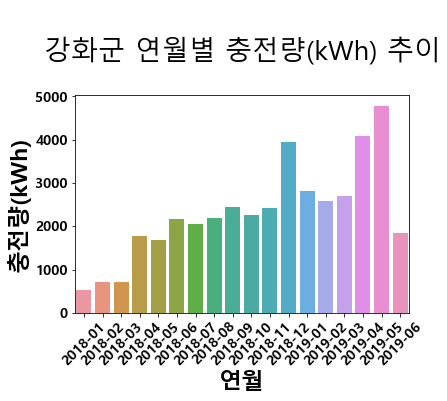

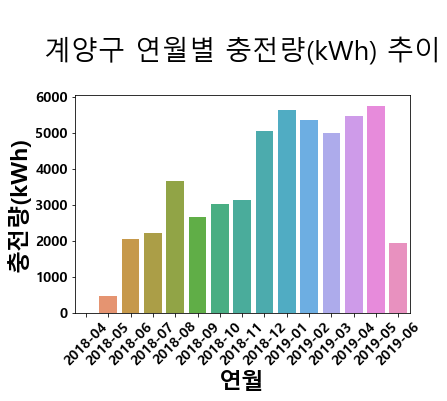

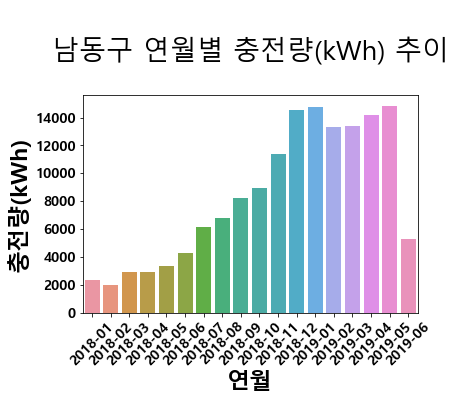

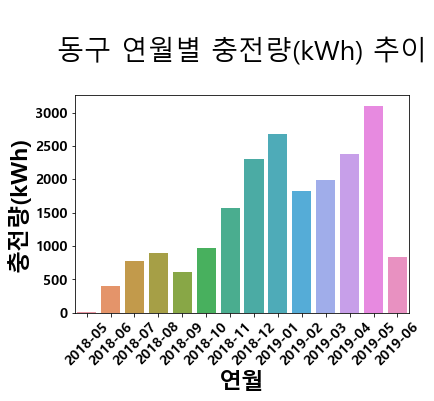

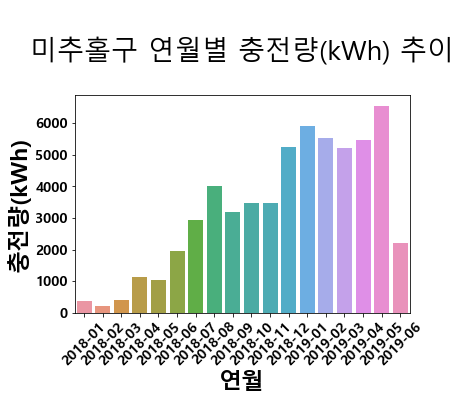

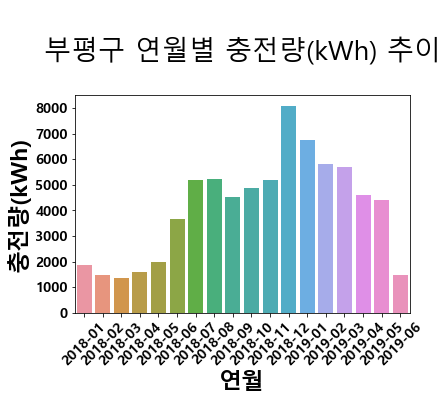

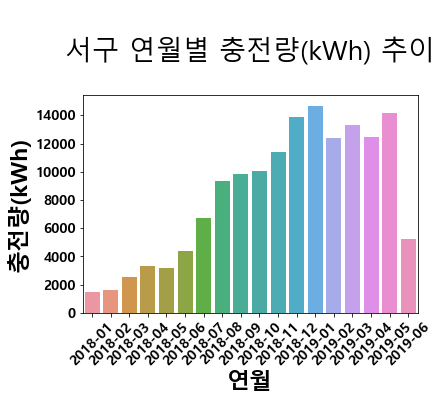

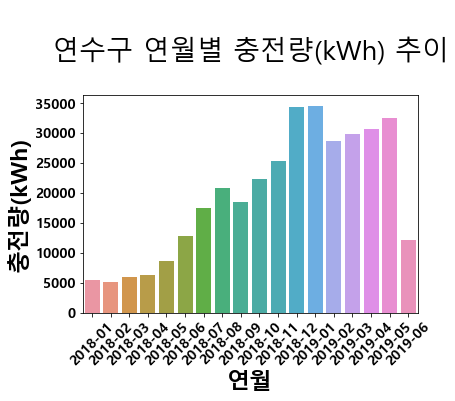

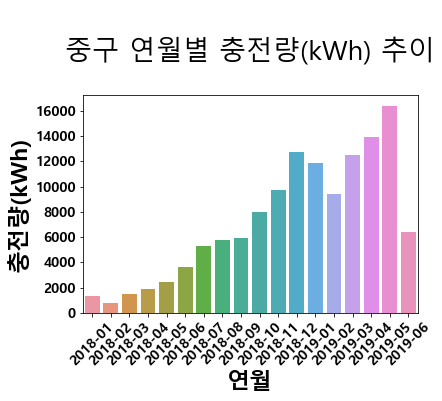

In [20]:
for i in range(len(ch_gg_year_mon.index.levels[0])) :
    s = pd.DataFrame()
    s['연월'] = ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][i], :].index
    s['충전량(kWh)'] = list(ch_gg_year_mon.loc[ch_gg_year_mon.index.levels[0][i], :]['충전량(kWh)'])
    sns.barplot(x = '연월', y = '충전량(kWh)', data = s)
    plt.title('\n'+ ch_gg_year_mon.index.levels[0][i] + ' 연월별 충전량(kWh) 추이\n', fontsize = 27)
    plt.xticks(rotation = 45, fontsize = 14 , fontweight = 'bold')
    plt.yticks(fontsize = 14, fontweight = 'bold')
    plt.xlabel('연월', fontsize = 23, fontweight = 'bold')
    plt.ylabel('충전량(kWh)', fontsize = 23, fontweight = 'bold')
    
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig( r"C:\Users\USER\Desktop\전기차\11.08_회의자료\군구별_연월별_충전량\ " + ch_gg_year_mon.index.levels[0][i] + " 연월별 충전량 추이.jpg",
                dpi= 100 , quality = 100,  bbox_inches='tight')
    

## 시간(시) 0시라는 것은 0시~ 0시59분59초까지를 의미

In [21]:
ch_t = ch_use.groupby(['시간']).sum()
ch_t.index.names = ['순서']
ch_t['시간']  = list(map(lambda x : int(x), ch_t.index) )
ch_t = ch_t.sort_values(["시간"], ascending = True)
ch_t['시간']  = list(map(lambda x : str(x) + '시', ch_t['시간']) )
ch_t = ch_t.iloc[: ,[1,0]]
ch_t

,시간,충전량(kWh)
순서,,
0,0시,37774.615
1,1시,19601.390
2,2시,15371.240
3,3시,7925.560
4,4시,5689.880
5,5시,6413.888
6,6시,11090.990
7,7시,19353.178
8,8시,27069.428


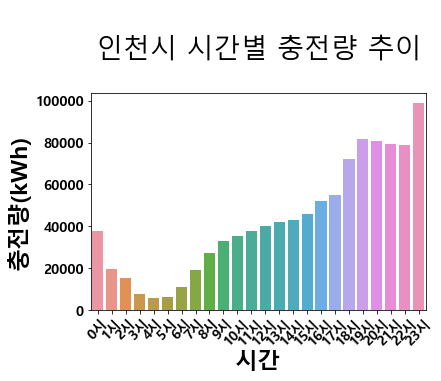

In [22]:
sns.barplot(x = '시간', y = '충전량(kWh)', data = ch_t)
plt.title("\n인천시 시간별 충전량 추이\n", fontsize = 27 )
plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel('시간', fontsize = 23, fontweight = 'bold' )
plt.ylabel('충전량(kWh)', fontsize = 23, fontweight = 'bold' )
fig = plt.gcf()
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig( r"C:\Users\USER\Desktop\전기차\11.08_회의자료\인천시_n별_충전량\인천시 시간별 충전량 추이.jpg",
            dpi= 100 , quality = 100,  bbox_inches='tight')

In [23]:
ch_gg_t = ch_use.groupby(['군구명', '시간']).sum()
ch_gg_t

충전량(kWh)
군구명 시간           
강화군 0     303.550
    1      95.280
    10   2165.990
    11   2656.210
    12   2811.890
    13   3491.600
    14   2855.260
    15   3846.900
    16   3759.700
    17   3141.620
    18   2265.730
    19   2548.610
    2      89.970
    20   2670.140
    21   1939.390
    22   1068.180
    23    587.430
    3      18.610
    4      32.350
    5     122.240
    6     331.450
    7     929.020
    8    1545.540
    9    2423.780
계양구 0     330.120
    1     234.990
    10   3059.680
    11   3297.550
    12   4503.310
    13   4125.400
    14   4074.310
    15   3804.890
    16   3575.240
    17   3115.750
    18   5033.070
    19   3040.400
    2     190.960
    20   2809.140
    21   2279.430
    22   1401.670
    23    667.340
    3     119.270
    4      46.050
    5      53.360
    6     327.490
    7     966.120
    8     901.450
    9    3516.580
남동구 0    6348.330
    1    2973.460
    10   6416.200
    11   6152.330
    12   5438.830
    13   5683.230
    14   5996.290
    15   5576.100
    16   8014.670
    17   6649.920
    18   8384.940
    19  10882.760
    2    2692.690
    20  13134.510
    21  11276.350
    22  11156.410
    23  15551.060
...           ...
서구  15   3689.340
    16   5459.450
    17   6791.980
    18   8868.480
    19  11217.720
    2    3597.660
    20  13397.070
    21  12788.700
    22  16108.230
    23  27772.400
    3    2308.400
    4     666.460
    5     506.300
    6    1230.940
    7    1392.260
    8    2936.700
    9    3297.670
연수구 0   10581.755
    1    5793.810
    10  11923.603
    11  13593.991
    12  13782.228
    13  14672.982
    14  14134.911
    15  15920.192
    16  17217.235
    17  19798.698
    18  26686.706
    19  29388.950
    2    3229.610
    20  27282.491
    21  27008.480
    22  29358.908
    23  35183.325
    3    1649.700
    4    1737.540
    5    1673.668
    6    3284.580
    7    8542.648
    8    9843.958
    9    9699.083
중구  0    6739.960
    1    5143.540
    10   2687.620
    11   2706.850
    12   3349.890
    13   3089.690
    14   3977.540
    15   4248.360
    16   5069.710
    17   6808.120
    18  10208.490
    19  13594.890
    2    3646.110
    20  11741.170
    21  13715.240
    22   9694.660
    23  10329.090
    3     930.210
    4     681.880
    5     571.380
    6    1741.720
    7    2303.880
    8    3821.450
    9    2903.270

[216 rows x 1 columns]

In [24]:
s = ch_gg_t.loc[ch_gg_t.index.levels[0][1], :].copy()
s

,충전량(kWh)
시간,
0,330.12
1,234.99
10,3059.68
11,3297.55
12,4503.31
13,4125.40
14,4074.31
15,3804.89
16,3575.24


In [25]:
s['시간'] = list(ch_gg_t.loc[ch_gg_t.index.levels[0][1], :].index)


In [26]:
ch_gg_t.index.names = ['군구명', '순서']

In [27]:
list(ch_gg_t.loc[ch_gg_t.index.levels[0][2], :].index)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [28]:
ch_gg_t.index.names = ['군구명', '순서']
temp = ch_gg_t.loc[ch_gg_t.index.levels[0][2], :].copy()
temp['시간'] = list(temp.index)
temp

,충전량(kWh),시간
순서,,
0,6348.33,0
1,2973.46,1
10,6416.20,10
11,6152.33,11
12,5438.83,12
13,5683.23,13
14,5996.29,14
15,5576.10,15
16,8014.67,16


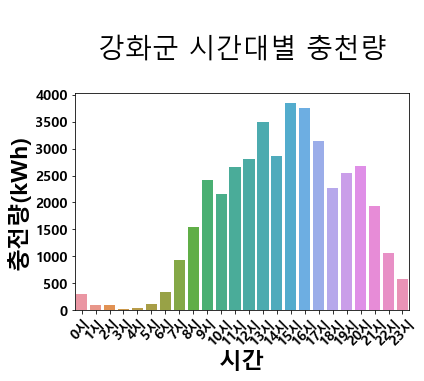

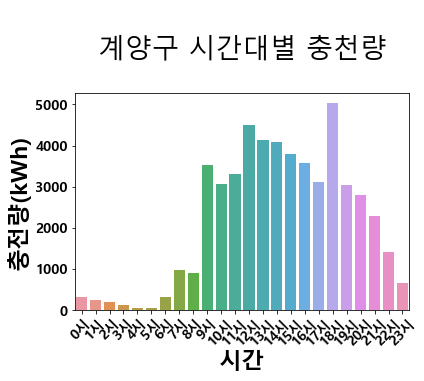

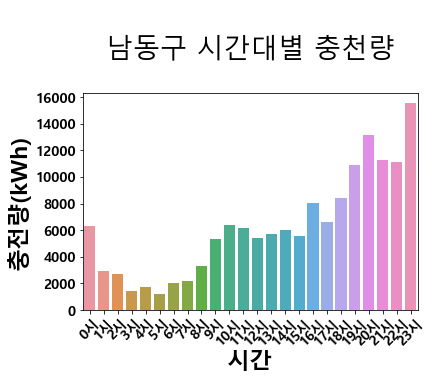

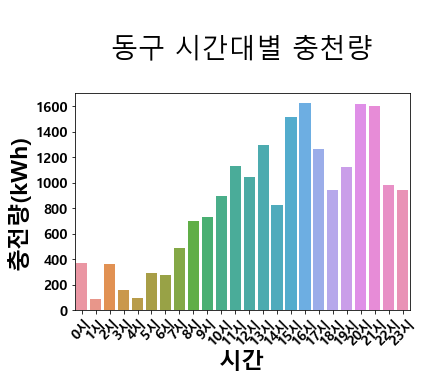

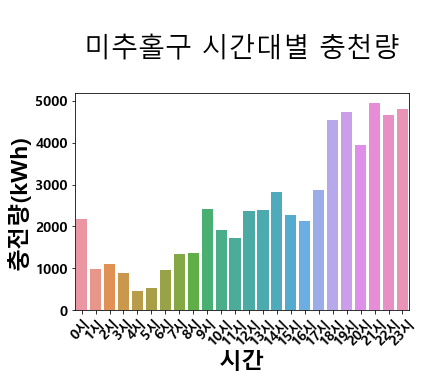

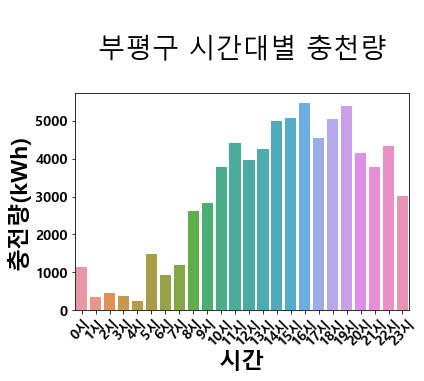

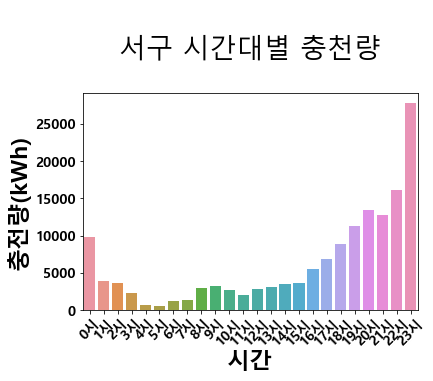

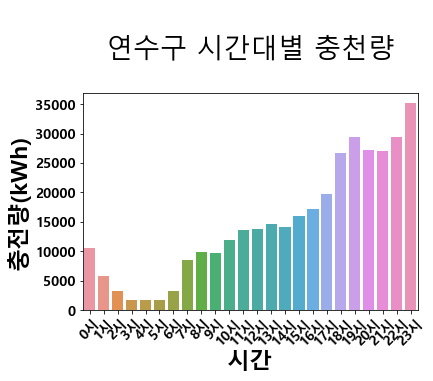

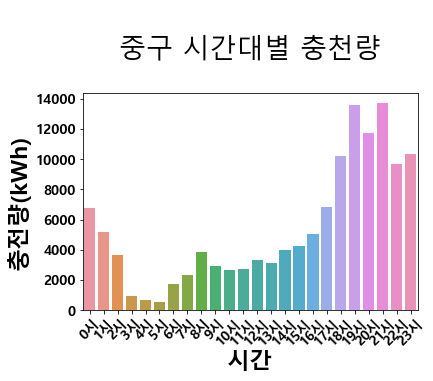

In [29]:
for i in range(len(ch_gg_t.index.levels[0])) :
    ch_gg_t.index.names = ['군구명', '순서']
    temp = ch_gg_t.loc[ch_gg_t.index.levels[0][i], :].copy()
    temp['시간'] = list(temp.index)
    temp['시간'] = list(map(lambda x : int(x), temp['시간']))
    temp = temp.sort_values(['시간'],ascending = True)
    temp['시간'] = list(map(lambda x : str(x) + '시', temp['시간'] ))
    temp = temp.iloc[:, [1,0]]
    
    sns.barplot(x = "시간", y = "충전량(kWh)", data = temp)
    
    plt.title("\n" + ch_gg_t.index.levels[0][i] + " 시간대별 충천량\n", fontsize = 27)
    plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
    plt.yticks(fontsize = 14, fontweight = 'bold')
    plt.xlabel("시간" , size= 23 ,fontweight = 'bold')
    plt.ylabel("충전량(kWh)" , size= 23,fontweight = 'bold')
    
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig( r'C:\Users\USER\Desktop\전기차\11.08_회의자료\군구별_시간별_충전량\ '+ ch_gg_t.index.levels[0][i] +' 시간대별 충전량 추이.jpg',
                dpi= 100 , quality = 100 ,  bbox_inches='tight') 
    '''    print(ch_gg_t.index.levels[0][i] + "의 시간대별 충천량\n")
    print(temp)
    print("\n")
    '''    

In [30]:
ch_ex = ch_use[ ch_use['충전소'] == '홈플러스 인천연수점']
ch_ex.head(3)

,용도별,충전소,충전량(kWh),시작일시,주소,군구명,연월,시간
27983,공용,홈플러스 인천연수점,28.16,2018-07-24 16:40:27,인천광역시 연수구 청능대로 210,연수구,2018-07,16
27984,공용,홈플러스 인천연수점,9.09,2018-07-25 12:15:35,인천광역시 연수구 청능대로 210,연수구,2018-07,12
27985,공용,홈플러스 인천연수점,13.48,2018-07-25 18:53:36,인천광역시 연수구 청능대로 210,연수구,2018-07,18


In [31]:
ch_ex2 = ch_ex.copy()
ch_ex2['시간'] = list(map(lambda x : int(x), ch_ex2['시간']))
ch_ex2.sort_values(['시간'], ascending = True)

,용도별,충전소,충전량(kWh),시작일시,주소,군구명,연월,시간
53610,공용,홈플러스 인천연수점,22.01,2019-02-01 07:22:24,인천광역시 연수구 청능대로 210,연수구,2019-02,7
53495,공용,홈플러스 인천연수점,63.20,2019-01-04 07:36:24,인천광역시 연수구 청능대로 210,연수구,2019-01,7
28041,공용,홈플러스 인천연수점,73.93,2018-08-16 07:45:47,인천광역시 연수구 청능대로 210,연수구,2018-08,7
28081,공용,홈플러스 인천연수점,8.54,2018-09-06 08:14:21,인천광역시 연수구 청능대로 210,연수구,2018-09,8
53859,공용,홈플러스 인천연수점,20.34,2019-03-29 08:58:03,인천광역시 연수구 청능대로 210,연수구,2019-03,8
28016,공용,홈플러스 인천연수점,2.35,2018-08-07 09:22:21,인천광역시 연수구 청능대로 210,연수구,2018-08,9
53577,공용,홈플러스 인천연수점,44.45,2019-01-25 09:00:44,인천광역시 연수구 청능대로 210,연수구,2019-01,9
53904,공용,홈플러스 인천연수점,13.48,2019-04-09 09:16:21,인천광역시 연수구 청능대로 210,연수구,2019-04,9
53645,공용,홈플러스 인천연수점,12.05,2019-02-08 09:16:20,인천광역시 연수구 청능대로 210,연수구,2019-02,9
53841,공용,홈플러스 인천연수점,47.66,2019-03-25 09:31:06,인천광역시 연수구 청능대로 210,연수구,2019-03,9


In [32]:
ch_ex_t = ch_ex.groupby(['시간']).sum()
ch_ex_t

,충전량(kWh)
시간,
10,2116.83
11,2136.26
12,2710.30
13,2262.73
14,2595.56
15,2857.48
16,2187.94
17,2070.62
18,2639.86


In [33]:
ch_ex_t = ch_ex.groupby(['시간']).sum()
ch_ex_t.index.names = ['순서']
ch_ex_t['시간'] = list(map(lambda x : int(x) , list(ch_ex_t.index)))
ch_ex_t = ch_ex_t.sort_values(['시간'], ascending = True)
ch_ex_t['시간'] = list(map(lambda x : str(x) + '시' , ch_ex_t['시간'] ))
ch_ex_t.index = list(range(len(ch_ex_t)))
ch_ex_t

,충전량(kWh),시간
0,159.14,7시
1,28.88,8시
2,508.47,9시
3,2116.83,10시
4,2136.26,11시
5,2710.30,12시
6,2262.73,13시
7,2595.56,14시
8,2857.48,15시
9,2187.94,16시


In [34]:
temp_ap = pd.DataFrame( [[0]*7,list( map( lambda x : str(x) + '시', list(range(7))))], index = ['충전량(kWh)', '시간']  ).T
temp_ap

,충전량(kWh),시간
0,0,0시
1,0,1시
2,0,2시
3,0,3시
4,0,4시
5,0,5시
6,0,6시


In [35]:
ch_ex_t2 = pd.concat([temp_ap, ch_ex_t], axis = 0)
ch_ex_t2

,충전량(kWh),시간
0,0,0시
1,0,1시
2,0,2시
3,0,3시
4,0,4시
5,0,5시
6,0,6시
0,159.14,7시
1,28.88,8시
2,508.47,9시


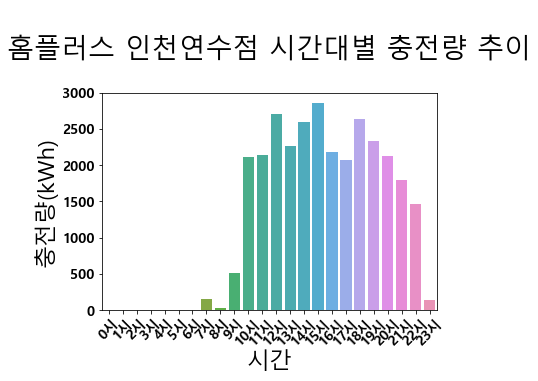

In [36]:
sns.barplot(x = '시간', y = '충전량(kWh)', data = ch_ex_t2)
plt.title("\n홈플러스 인천연수점 시간대별 충전량 추이\n", fontsize = 27)
plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel('시간', fontsize = 23)
plt.ylabel("충전량(kWh)", fontsize = 23)
plt.show()

In [37]:
ch_ex_ym = ch_ex.groupby(['연월']).sum()
ch_ex_ym

,충전량(kWh)
연월,
2018-07,382.28
2018-08,1757.73
2018-09,1692.79
2018-10,2220.72
2018-11,2496.73
2018-12,4189.50
2019-01,3559.68
2019-02,3318.07
2019-03,3581.95


In [38]:
ch_ex_ym.index.names = ['순서']
ch_ex_ym['연월'] = list(ch_ex_ym.index)
ch_ex_ym.index = list(range(len(ch_ex_ym)))
ch_ex_ym

,충전량(kWh),연월
0,382.28,2018-07
1,1757.73,2018-08
2,1692.79,2018-09
3,2220.72,2018-10
4,2496.73,2018-11
5,4189.50,2018-12
6,3559.68,2019-01
7,3318.07,2019-02
8,3581.95,2019-03
9,3110.65,2019-04


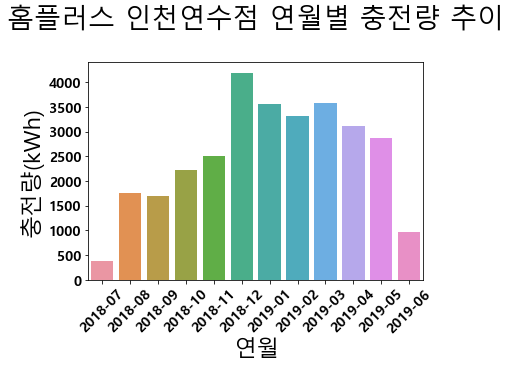

In [39]:
sns.barplot(x = '연월', y = '충전량(kWh)', data = ch_ex_ym)
plt.title("홈플러스 인천연수점 연월별 충전량 추이\n", fontsize = 27)
plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel('연월', fontsize = 23)
plt.ylabel('충전량(kWh)', fontsize = 23)
plt.show()

In [40]:
ch_use.head(2)

,용도별,충전소,충전량(kWh),시작일시,주소,군구명,연월,시간
0,공용,G-Tower(경제자유구역청),28.47,2018-04-23 09:21:05,인천광역시 연수구 아트센터대로 175,연수구,2018-04,9
1,공용,G-Tower(경제자유구역청),17.97,2018-04-23 17:47:28,인천광역시 연수구 아트센터대로 175,연수구,2018-04,17


In [41]:
'영종힐스테이트', '송도글로벌캠퍼스푸르지오 아파트', '청라SK뷰', '구월아시아드선수촌센트럴자이 아파트'

('영종힐스테이트', '송도글로벌캠퍼스푸르지오 아파트', '청라SK뷰', '구월아시아드선수촌센트럴자이 아파트')

In [42]:
ch_use[ ch_use['용도별'] == '아파트용'].groupby(['충전소']).sum().sort_values(['충전량(kWh)'],ascending = False)

,충전량(kWh)
충전소,
영종힐스테이트,24684.500
영종우미린2단지,23685.000
영종하늘도시한라비발디 아파트,21521.600
송도글로벌캠퍼스푸르지오 아파트,20123.300
청라SK뷰,19225.520
송도아트윈푸르지오,17751.257
송도자이하버뷰1단지,17105.210
영종자이 아파트,17036.400
인천에스케이스카이뷰,16264.420


In [43]:
ch_apart = ch_use[ ch_use['충전소'] == '영종힐스테이트'].groupby(['시간']).sum()
ch_apart.index.names = ['순서']
ch_apart['시간'] = list(map(lambda x : int(x) ,list(ch_apart.index) )) 
ch_apart = ch_apart.sort_values(['시간'], ascending = True)
ch_apart['시간'] = list(map(lambda x : str(x) + '시', ch_apart['시간'] ))
ch_apart

,충전량(kWh),시간
순서,,
0,912.19,0시
1,352.30,1시
2,230.12,2시
3,230.05,3시
4,33.80,4시
5,144.04,5시
6,225.96,6시
7,218.79,7시
8,268.99,8시


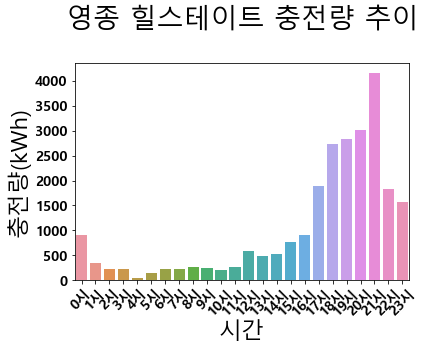

In [44]:
sns.barplot(x = '시간', y = '충전량(kWh)', data = ch_apart)
plt.title("영종 힐스테이트 충전량 추이\n", fontsize = 27)
plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel('시간', fontsize = 23)
plt.ylabel('충전량(kWh)', fontsize = 23)
plt.show()

In [45]:
ch_use.head(1)

,용도별,충전소,충전량(kWh),시작일시,주소,군구명,연월,시간
0,공용,G-Tower(경제자유구역청),28.47,2018-04-23 09:21:05,인천광역시 연수구 아트센터대로 175,연수구,2018-04,9


In [46]:
ch_use['용도별'].unique()

array(['공용', '아파트용'], dtype=object)

In [47]:
ch_op = ch_use[ ch_use['용도별'] == '공용']
ch_op.groupby(['충전소']).sum().sort_values(['충전량(kWh)'], ascending = False)

,충전량(kWh)
충전소,
LH인천본부,44845.70
남인천지사,41648.33
인천경제산업정보테크노파크,38209.32
홈플러스 인천연수점,30144.83
인천직할,29230.20
계양구청,23714.35
강화군청,19855.63
G-Tower(경제자유구역청),16950.37
인천업사이클 에코센터,15760.36


In [48]:
#.groupby(['시간']).sum()

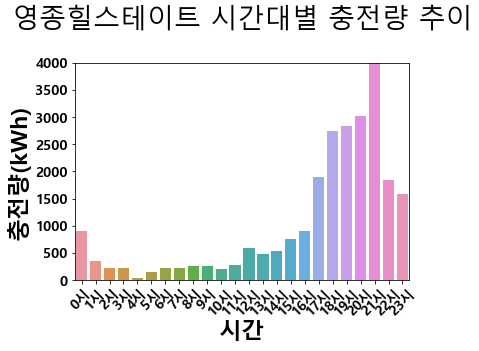

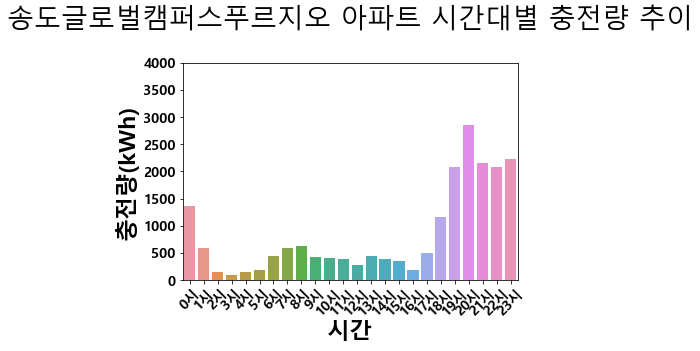

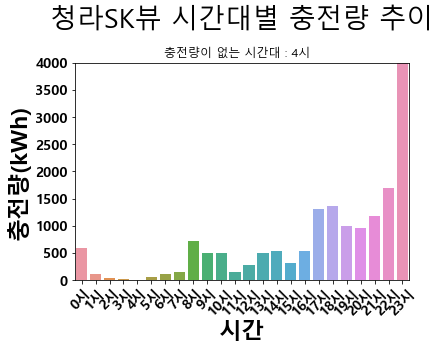

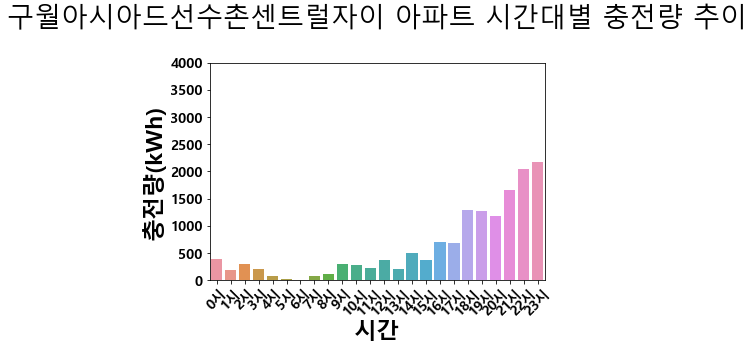

In [49]:
op_name = ['영종힐스테이트', '송도글로벌캠퍼스푸르지오 아파트', '청라SK뷰', '구월아시아드선수촌센트럴자이 아파트']
u = set(range(0,24))

import matplotlib.pylab as pylab

for i in range(len(op_name)) :
    
    # 충전소 일치하는 것들 찾기
    ch_temp = ch_use[ ch_use['충전소'] == op_name[i] ].groupby(['시간']).sum()
    
    # 전처리( 0시 ~ 24시로 형태 일치 )
    ch_temp.index.names = ['순서']
    
    ch_temp['시간'] = list( map( lambda x : int(x) , list(ch_temp.index) ) )
    
    temp_union_list = list( u - set(ch_temp['시간']))
    
    temp_df = pd.DataFrame( [ [0]*len(temp_union_list), temp_union_list], index = ['충전량(kWh)', '시간']  ).T
    ch_temp_df = pd.concat([temp_df, ch_temp], axis = 0)
    ch_temp_df = ch_temp_df.sort_values(['시간'], ascending = True)
    ch_temp_df['시간'] = list( map( lambda x : int(x) , ch_temp_df['시간'] ) )
    ch_temp_df['시간'] = list( map( lambda x : str(x) + '시' , ch_temp_df['시간'] ) )
    
    # graph
    sns.barplot(x = '시간', y = '충전량(kWh)', data = ch_temp_df)
    plt.title(op_name[i] + " 시간대별 충전량 추이\n", fontsize = 27)
    if( len(set(ch_temp['시간'])) != 24 ) :
        plt.suptitle('\n충전량이 없는 시간대 : ' + ' , '.join(list( map( lambda x : str(x) + '시' , temp_union_list ) )[0:]) + '\n\n\n')
    plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
    plt.yticks(fontsize = 14, fontweight = 'bold')
    plt.xlabel('시간', fontsize = 23, fontweight = 'bold')
    plt.ylabel('충전량(kWh)', fontsize = 23, fontweight = 'bold')
    plt.ylim(0,4000)
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches(50.5, 30.5)
    fig.savefig( r'C:\Users\USER\Desktop\전기차\11.08_회의자료\각 지점_시간대별_충전량\ ' + op_name[i] + '의 시간대별 충전량 추이.jpg',  
                bbox_inches='tight') 

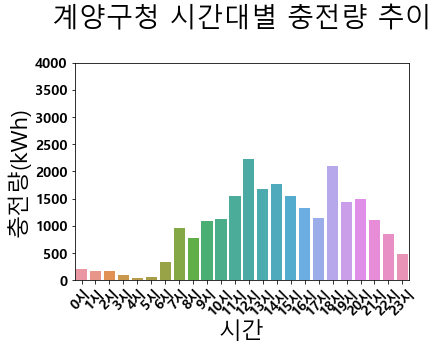

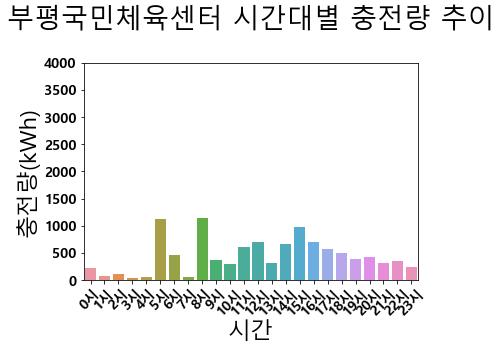

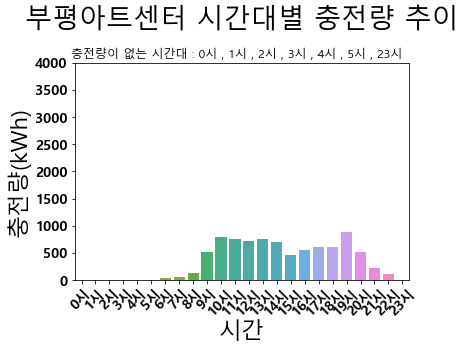

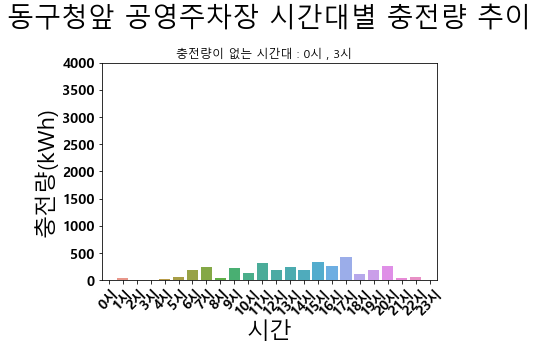

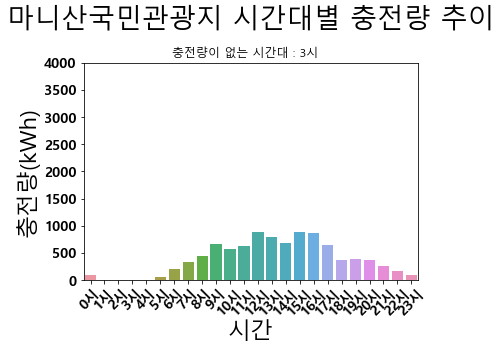

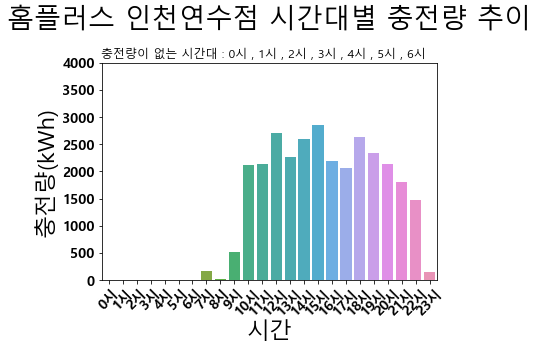

In [50]:
op_name = ['계양구청', '부평국민체육센터', '부평아트센터', '동구청앞 공영주차장', '마니산국민관광지', '홈플러스 인천연수점']
u = set(range(0,24))

for i in range(len(op_name)) :
    
    # 충전소 일치하는 것들 찾기
    ch_temp = ch_use[ ch_use['충전소'] == op_name[i] ].groupby(['시간']).sum()
    
    # 전처리( 0시 ~ 24시로 형태 일치 )
    ch_temp.index.names = ['순서']
    
    ch_temp['시간'] = list( map( lambda x : int(x) , list(ch_temp.index) ) )
    
    temp_union_list = list( u - set(ch_temp['시간']))
    
    temp_df = pd.DataFrame( [ [0]*len(temp_union_list), temp_union_list], index = ['충전량(kWh)', '시간']  ).T
    ch_temp_df = pd.concat([temp_df, ch_temp], axis = 0)
    ch_temp_df = ch_temp_df.sort_values(['시간'], ascending = True)
    ch_temp_df['시간'] = list( map( lambda x : int(x) , ch_temp_df['시간'] ) )
    ch_temp_df['시간'] = list( map( lambda x : str(x) + '시' , ch_temp_df['시간'] ) )
    
    # graph
    
    sns.barplot(x = '시간', y = '충전량(kWh)', data = ch_temp_df)
    fig = plt.gcf()
    plt.title( op_name[i] + " 시간대별 충전량 추이\n", fontsize = 27)
    
    if( len(set(ch_temp['시간'])) != 24 ) :
        plt.suptitle('\n충전량이 없는 시간대 : ' + ' , '.join(list( map( lambda x : str(x) + '시' , temp_union_list ) )[0:]) + '\n\n\n')
    
    plt.xticks(rotation = 45, fontsize = 14, fontweight = 'bold')
    plt.yticks(fontsize = 14, fontweight = 'bold')
    plt.xlabel('시간', fontsize = 23)
    plt.ylabel('충전량(kWh)', fontsize = 23)
    plt.ylim(0,4000)
    
    plt.show()
    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    fig.savefig( r'C:\Users\USER\Desktop\전기차\11.08_회의자료\각 지점_시간대별_충전량\ ' + op_name[i] + ' 시간대별 충전량 추이.jpg'
                ,  bbox_inches='tight')
    
    

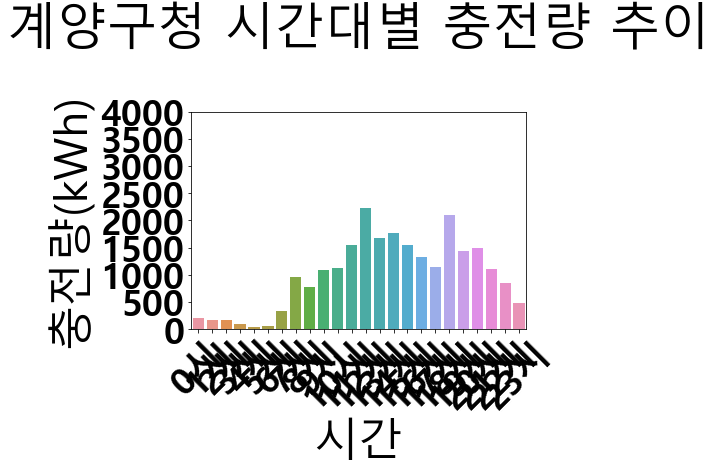

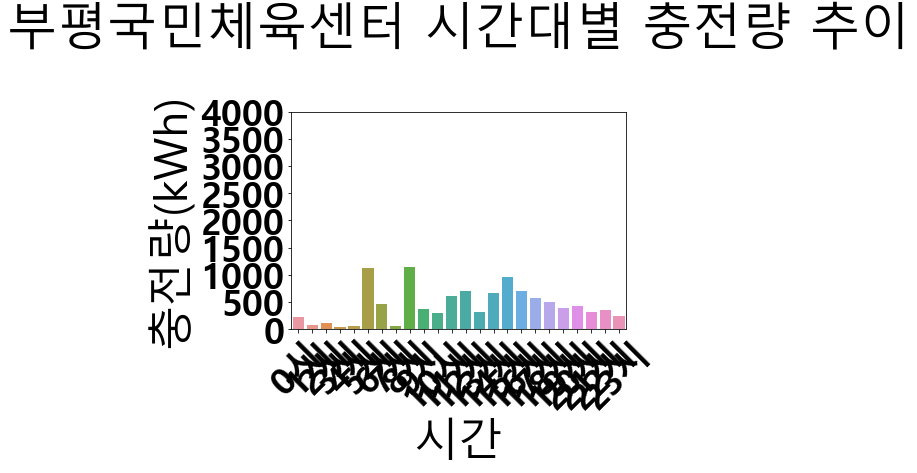

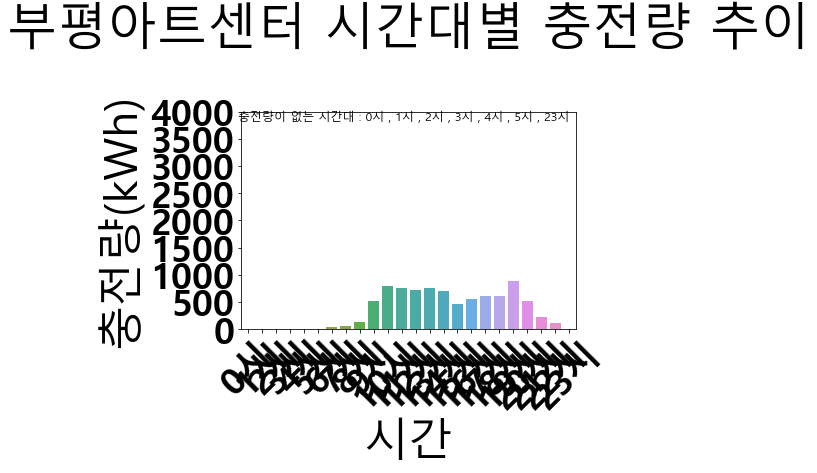

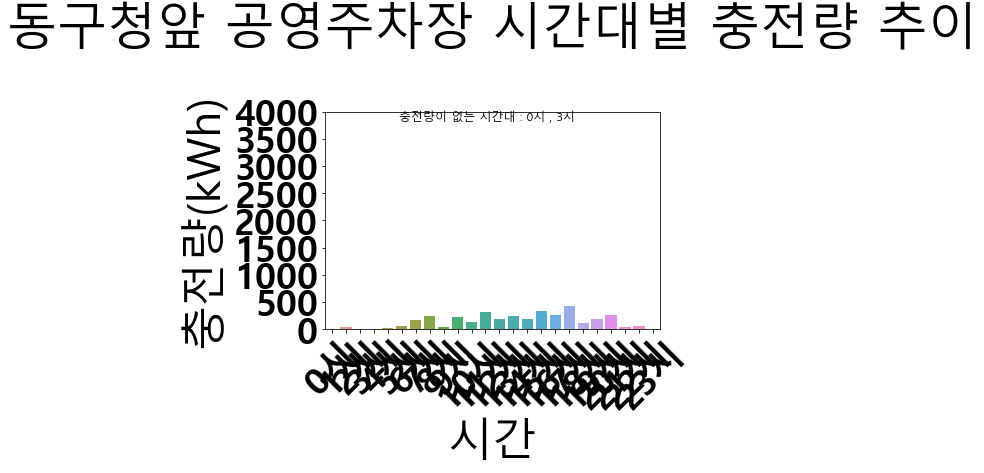

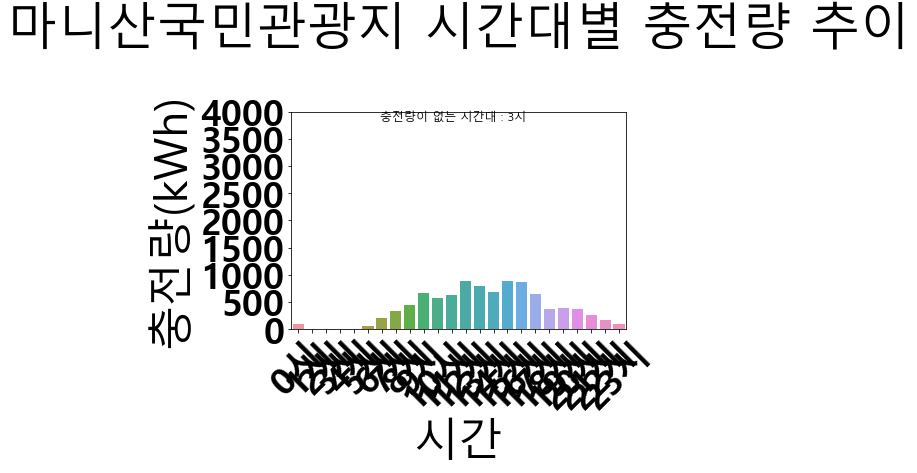

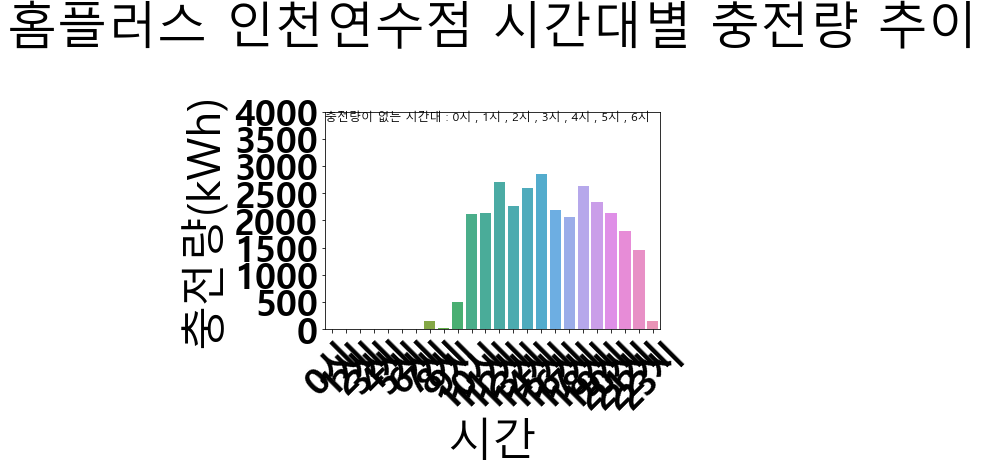

In [74]:
op_name = ['계양구청', '부평국민체육센터', '부평아트센터', '동구청앞 공영주차장', '마니산국민관광지', '홈플러스 인천연수점']
u = set(range(0,24))

for i in range(len(op_name)) :
    
    # 충전소 일치하는 것들 찾기
    ch_temp = ch_use[ ch_use['충전소'] == op_name[i] ].groupby(['시간']).sum()
    
    # 전처리( 0시 ~ 24시로 형태 일치 )
    ch_temp.index.names = ['순서']
    
    ch_temp['시간'] = list( map( lambda x : int(x) , list(ch_temp.index) ) )
    
    temp_union_list = list( u - set(ch_temp['시간']))
    
    temp_df = pd.DataFrame( [ [0]*len(temp_union_list), temp_union_list], index = ['충전량(kWh)', '시간']  ).T
    ch_temp_df = pd.concat([temp_df, ch_temp], axis = 0)
    ch_temp_df = ch_temp_df.sort_values(['시간'], ascending = True)
    ch_temp_df['시간'] = list( map( lambda x : int(x) , ch_temp_df['시간'] ) )
    ch_temp_df['시간'] = list( map( lambda x : str(x) + '시' , ch_temp_df['시간'] ) )
    
    # graph
    
    sns.barplot(x = '시간', y = '충전량(kWh)', data = ch_temp_df)
    fig = plt.gcf()
    plt.title( op_name[i] + " 시간대별 충전량 추이\n", fontsize = 50)
    
    if( len(set(ch_temp['시간'])) != 24 ) :
        plt.suptitle('\n\n충전량이 없는 시간대 : ' + ' , '.join(list( map( lambda x : str(x) + '시' , temp_union_list ) )[0:]) + '\n\n\n\n\n')
    
    plt.xticks(rotation = 45, fontsize = 36, fontweight = 'bold')
    plt.yticks(fontsize = 36, fontweight = 'bold')
    plt.xlabel('시간', fontsize = 45)
    plt.ylabel('충전량(kWh)', fontsize = 45)
    plt.ylim(0,4000)
    
    plt.show()
    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    fig.savefig( r'C:\Users\USER\Desktop\전기차\11.08_회의자료\예시\ ' + op_name[i] + ' 시간대별 충전량 추이.jpg'
                ,  bbox_inches='tight', dpi= 'figure' ,progressive = True)

# 2. 건물 level별 시간대별 평균 충전량 추이

## 건물2 & 충전소가 있는 격자 => 시간대별 사용량

In [51]:
df = pd.read_csv("인천시_전기차_충전소_입지분석_250M_격자별_전처리_완료.csv", encoding = "CP949")
df.head(1)

,gid,경제인구,건물2,건물3,변압기,전기차,서비스기간,서비스빈도,서비스일수,총충전량,충전소,건물1,민원행정기관,주차장,도서관
0,가사46aa99bb,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [52]:
df.isnull().sum()

gid           0
경제인구      14949
건물2           0
건물3           0
변압기           0
전기차           0
서비스기간     19664
서비스빈도     19664
서비스일수     19664
총충전량      19664
충전소       19664
건물1           0
민원행정기관        0
주차장           0
도서관           0
dtype: int64

In [53]:
df = df.fillna(0)
df.head(1)

,gid,경제인구,건물2,건물3,변압기,전기차,서비스기간,서비스빈도,서비스일수,총충전량,충전소,건물1,민원행정기관,주차장,도서관
0,가사46aa99bb,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [54]:
len(df[ (df['건물2'] >= 1)])

1976

In [55]:
len(df[ (df['건물3'] >= 1)])

127

In [58]:
cha_bul2 = df[ (df['충전소'] >=1 )& (df['건물2'] >= 1)]
print(len(cha_bul2),len(df[ (df['건물2'] >= 1)]),len(df[ (df['건물3'] >= 1)]))

111 1976 127


In [ ]:
cha_bul2 = df[ (df['충전소'] >=1 )& (df['건물3'] >= 1)]
len(cha_bul2)

## 건물3 & 충전소가 있는 격자 => 시간대별 사용량